**Desafío**

1. Promedio de área de todos los inmuebles en los barrios en el dataset. El top 10.

2. Consultar otros datos estadísticos, conteo, mediana, valores mínimo y máximo.

###Recolectando la informacion necesaria  

In [97]:
from google.colab import drive
drive.mount('/content/drive')  #Montando la carpeta de Mi Drive para asi extraer el archivo para el analisis

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
import pandas as pd
inmuebles = pd.read_csv('/content/drive/MyDrive/inmersion_datos/inmuebles_bogota.csv') #Asignando el dataset a una variable llamada "inmuebles"

In [99]:
columnas = {'Baños':'Banos','Área':'Area'}
inmuebles = inmuebles.rename(columns=columnas) #Asignando nuevos nombres a las columnas 
inmuebles.head(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


###Desafío 1

###Estudiar mejor el histograma de valores, seleccionar 3 tipos de inmuebles (Refinar el gráfico: Títulos, aumentar el tamaño de labels, colores, conclusión de la información)

In [100]:
valor = inmuebles.Valor.str.split(expand=True) 
inmuebles['Moneda'] = valor[0] 
inmuebles['Precio'] = valor[1] 

In [101]:
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True) 

In [102]:
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000 

###Crear un dataframe que solo contenga 3 tipos de inmuebles

In [103]:
tipos_inmuebles = inmuebles[inmuebles.Tipo.isin(['Apartamento','Casa','Local'])]
tipos_inmuebles.sample(10)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
2942,Apartamento,Apartamento en venta en Bosa,3,2,52,Bosa,Bosa Central,$ 155.000.000,$,155000000,155.00
3762,Apartamento,Apartamento en venta en Santa Barbara,1,1,48,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 270.000.000,$,270000000,270.00
3914,Apartamento,Apartamento en venta en Zona Noroccidental,3,3,109,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 515.000.000,$,515000000,515.00
1492,Casa,Casa en venta en San Cristobal,5,2,274,San Cristobal,Sosiego,$ 130.000.000,$,130000000,130.00
8203,Apartamento,Apartamento en venta en Bosa,2,1,42,Bosa,Bosa Central,$ 135.000.000,$,135000000,135.00
2792,Apartamento,Apartamento en venta en Bosa,3,1,48,Bosa,Bosa Central,$ 126.500.000,$,126500000,126.50
5798,Apartamento,Apartamento en venta en Puente Aranda,2,3,134,Puente Aranda,PUENTE ARANDA: Zona Industrial + Puente Aranda,$ 1.040.000.000,$,1040000000,1040.00
1981,Apartamento,Apartamento en venta en Usaquén,1,1,60,Usaquén,Usaquén,$ 828.400.000,$,828400000,828.40
4250,Apartamento,Apartamento en venta en Engativa,3,1,53,Engativa,Engativá,$ 159.000.000,$,159000000,159.00
2716,Apartamento,Apartamento en venta en Cedritos,1,2,46,Cedritos,Usaquén,$ 255.000.000,$,255000000,255.00


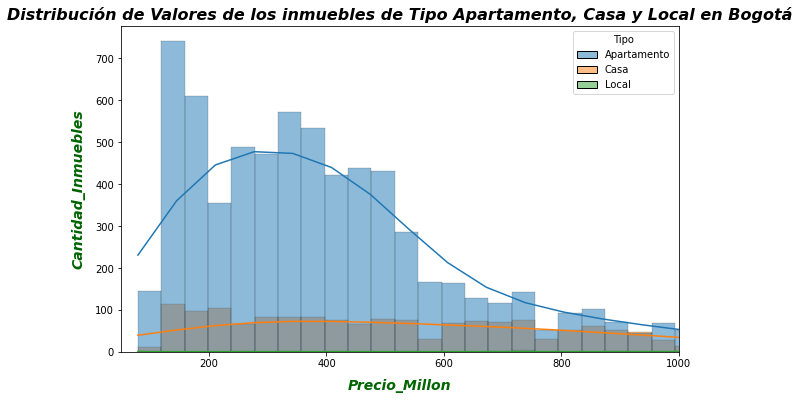

In [104]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(10,6)) 
grafica = sns.histplot(data=tipos_inmuebles, x='Precio_Millon',kde=True, hue='Tipo') 
plt.xlabel('Precio_Millon', fontsize=14,labelpad=10,fontstyle='italic', color='darkgreen',fontweight='bold')
plt.ylabel('Cantidad_Inmuebles', fontsize=14,labelpad=10,fontstyle='italic', color='darkgreen',fontweight='bold')
grafica.set_title('Distribución de Valores de los inmuebles de Tipo Apartamento, Casa y Local en Bogotá', fontsize=16, fontstyle='italic', fontweight='bold') 
plt.xlim((50,1000))
plt.show() 

Con este grafico podemos conocer un poco mejor la distribucion de los valores de los inmuebles por el tipo de inmueble en Bogotá, ya que nos permite identificar cuáles son los tipos de inmuebles que tienen un valor más alto y cuáles tienen un valor más bajo. Además, este gráfico puede ayudarnos a comprender si existe alguna relación entre el tipo de inmueble y su valor. Asimismo, también podemos identificar cuáles son los valores típicos (mediana o promedio) de cada tipo de inmueble, lo que nos puede dar una idea de cuál es el precio de mercado en general para cada categoría. En definitiva, este gráfico es una herramienta valiosa para entender mejor el mercado inmobiliario en Bogotá en términos de los diferentes tipos de inmuebles y puede ser de gran utilidad tanto para compradores como para vendedores en el proceso de toma de decisiones.

###Desafio 2

Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable. (valor/m2)

In [105]:
promedio_area_barrio = inmuebles.groupby('Barrio')['Area'].mean() 
promedio_area_barrio

Barrio
Alameda               97.00
Alhambra             190.41
Andes Norte          124.86
Antonio Nariño       163.06
Barrancas             70.20
                      ...  
Villa Maria          207.15
Villas De Granada     86.59
Villemar              76.89
Zona Franca           54.00
Zona Noroccidental   135.79
Name: Area, Length: 149, dtype: float64

In [106]:
promedio_valor_barrio = inmuebles.groupby('Barrio')['Precio_Millon'].mean()
promedio_valor_barrio

Barrio
Alameda              580.00
Alhambra             752.35
Andes Norte          709.57
Antonio Nariño       459.22
Barrancas            314.13
                      ...  
Villa Maria          402.85
Villas De Granada    282.30
Villemar             303.83
Zona Franca          160.00
Zona Noroccidental   620.81
Name: Precio_Millon, Length: 149, dtype: float64

In [107]:
inmuebles_precio_area = pd.concat([promedio_area_barrio, promedio_valor_barrio], axis=1)
inmuebles_precio_area['Valor_m2'] = inmuebles_precio_area['Precio_Millon']/inmuebles_precio_area['Area']
pd.set_option('display.precision',2) 
inmuebles_precio_area = inmuebles_precio_area.reset_index(col_level=0)
inmuebles_precio_area = inmuebles_precio_area.rename(columns={'Barrio':'Barrio'})
inmuebles_precio_area = inmuebles_precio_area.sort_values(by='Valor_m2', ascending=False)
inmuebles_precio_area

,Barrio,Area,Precio_Millon,Valor_m2
124,Santa Ana,309.38,3172.50,10.25
49,El Virrey,93.83,931.67,9.93
65,La Candelaria,173.72,1544.23,8.89
70,La Merced,41.00,359.50,8.77
40,El Castillo,134.25,1137.50,8.47
...,...,...,...,...
80,Las Ferias,320.00,550.00,1.72
83,Libertador,642.00,1020.00,1.59
116,Roma,260.00,350.00,1.35
11,Bosa Piamonte,400.00,470.00,1.18


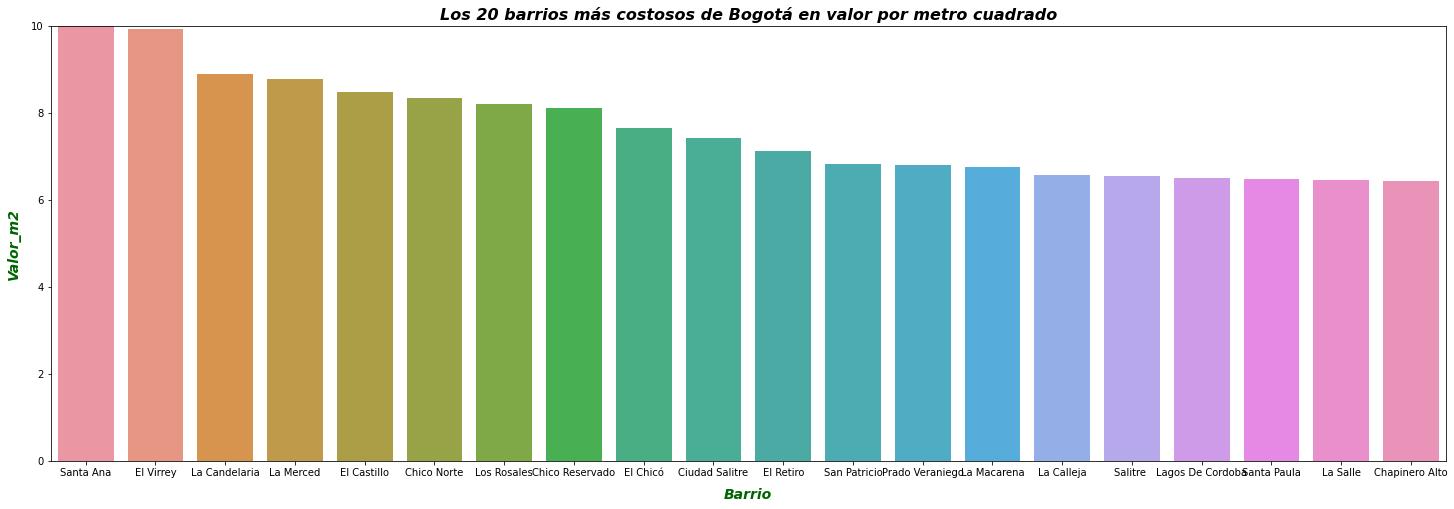

In [108]:
import seaborn as sns

plt.figure(figsize=(25,8)) 
grafica = sns.barplot(data=inmuebles_precio_area.head(20), x='Barrio', y='Valor_m2')

grafica.set_title('Los 20 barrios más costosos de Bogotá en valor por metro cuadrado',fontsize=16, fontstyle='italic', fontweight='bold') 
plt.xlabel('Barrio', fontsize=14,labelpad=10,fontstyle='italic', color='darkgreen',fontweight='bold')
plt.ylabel('Valor_m2', fontsize=14,labelpad=10,fontstyle='italic', color='darkgreen',fontweight='bold')
plt.ylim((0,10))

plt.show()

Con este grafico podemos conocer los barrios mas costosos en Bogota, esto teniendo en cuenta el valor del m2. Además, este gráfico también nos permite identificar patrones y tendencias en el mercado inmobiliario de Bogotá, como por ejemplo, si existen ciertas zonas de la ciudad que tienden a tener un valor por metro cuadrado más elevado que otras. Asimismo, puede ser de gran utilidad para aquellos que buscan comprar o alquilar una propiedad en la ciudad, ya que les permite conocer cuáles son los barrios que tienen un valor por metro cuadrado más alto y tomar decisiones informadas en cuanto a su presupuesto y preferencias. En definitiva, este gráfico es una herramienta valiosa para entender mejor el mercado inmobiliario en Bogotá y tomar decisiones más acertadas en cuanto a la compra o alquiler de una propiedad.



